In [47]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Data Preparation

In [20]:
crypto_df = pd.read_csv(Path('crypto_data.csv'))
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [19]:
target_df=crypto_df.loc[(crypto_df['IsTrading']==True)]
target_df


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [18]:
new_target_df=target_df.drop(columns=['IsTrading'])
new_target_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [25]:
no_nulls_df=new_target_df.dropna()
no_nulls_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [24]:
total_coins_df=no_nulls_df.loc[(no_nulls_df['TotalCoinsMined']>0)]
total_coins_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [26]:
no_coin_name=total_coins_df.drop(columns=['CoinName'])
no_coin_name

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [67]:
no_coin_name_dummies = pd.get_dummies(no_coin_name, columns=['Algorithm','ProofType'])
no_coin_name_dummies

,Unnamed: 0,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,42,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,404,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,ETH,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
coins_scaler = StandardScaler().fit(no_coin_name_dummies)

ValueError: could not convert string to float: 'BTC'

Dimensionality Reduction

In [59]:
pca = PCA(n_components=0.9)
df_pca = pca.fit_transform(coins_scaler)

In [60]:
coins_pca = pd.DataFrame(
    data=df_pca
)
coins_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,-0.306478,-0.134248,-1.274413e-14,4.356133e-15,0.034075,1.765116,-0.400153,0.105507,-2.213661,-0.508047,...,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00
1,-0.286779,-0.135378,-1.746480e-14,6.132689e-15,0.029073,1.763942,-0.400047,0.105766,-2.216127,-0.508439,...,-1.298868e-14,-9.386088e-15,5.049843e-15,1.286720e-15,3.343119e-15,-8.864581e-16,3.431678e-15,-3.544011e-15,-2.340436e-15,2.375090e-15
2,0.361159,-0.003304,-2.747194e-16,6.277497e-15,-0.094542,2.909136,-0.481620,-0.442389,-1.633107,0.000252,...,5.856127e-15,2.605936e-15,3.373196e-15,4.692167e-15,2.909864e-15,4.078942e-15,-9.221918e-16,-3.074884e-15,-3.763365e-16,-7.325841e-16
3,-0.287881,-0.256431,-2.254146e-14,1.296677e-14,0.001154,-1.825765,0.183748,-0.142160,0.426857,0.250633,...,-4.849313e-01,-1.036901e+00,-3.284834e+00,-4.067318e-01,1.184380e+00,1.136618e+00,2.090930e-01,-1.661621e+00,3.133866e-01,-7.993422e-01
4,-0.136884,-0.256819,-2.131305e-14,4.601184e-15,-0.049065,-1.761258,0.160765,-0.086250,0.497740,0.093311,...,-1.975583e+00,2.540220e+00,1.742414e+00,-1.221248e+00,5.516270e-01,-1.707077e+00,5.062984e-01,5.475711e-02,1.374776e-01,5.531545e-01


In [61]:
pca.explained_variance_ratio_

array([0.00458275, 0.00441599, 0.00440873, 0.00440873, 0.00439698,
       0.00417911, 0.00399131, 0.00395332, 0.00382562, 0.00363754,
       0.00354395, 0.0034902 , 0.00346206, 0.00340776, 0.00338093,
       0.00330963, 0.00330871, 0.00330655, 0.00330655, 0.00330655,
       0.00330655, 0.00330655, 0.00330655, 0.00330648, 0.00330483,
       0.00328966, 0.00327172, 0.00326623, 0.00321293, 0.00318048,
       0.00316861, 0.00316216, 0.00315996, 0.00314108, 0.00312424,
       0.0031137 , 0.00310847, 0.00310321, 0.00308557, 0.00307458,
       0.00303845, 0.00303296, 0.0030183 , 0.00301373, 0.00300257,
       0.00299494, 0.00299387, 0.00298751, 0.0029855 , 0.00298157,
       0.00296377, 0.00295936, 0.00295555, 0.00293021, 0.00292564,
       0.0028761 , 0.00286206, 0.00283905, 0.00278385, 0.00276602,
       0.00273414, 0.00268138, 0.00267446, 0.00266588, 0.00265738,
       0.00261594, 0.0025889 , 0.00257803, 0.00255124, 0.00253077,
       0.00251547, 0.00241553, 0.0023417 , 0.00224803, 0.00222

In [62]:
tsne = TSNE(learning_rate=35)

In [63]:
tsne_features = tsne.fit_transform(coins_pca)

In [43]:
tsne_features.shape

(532, 2)

In [64]:
# The first column of transformed features
coins_pca['x'] = tsne_features[:,0]

# The second column of transformed features
coins_pca['y'] = tsne_features[:,1]

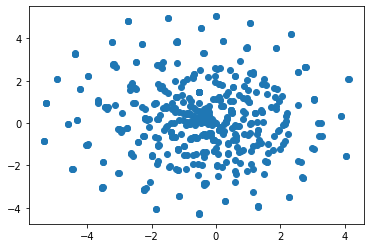

In [65]:
plt.scatter(coins_pca['x'], coins_pca['y'])
plt.show()

Cluster Analysis with k-Means

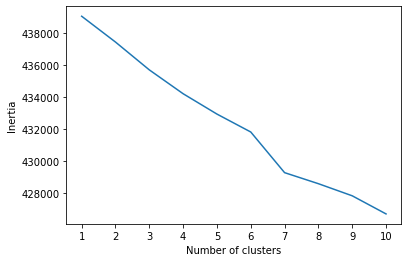

In [66]:
inertia = []
k = list(range(1, 11))
#k = [1,2,3,4,5,6,7,8,9,10]

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(coins_pca)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()